<a href="https://colab.research.google.com/github/snowman74/Neural-Networks/blob/main/%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка текстов с помощью нейросетей

In [ ]:
from google.colab import files, drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -R /content/texts

rm: cannot remove '/content/texts': No such file or directory


In [ ]:
!unzip -q '/content/drive/My Drive/Базы/Тексты писателей.zip' -d /content/texts

In [ ]:
def readText(filename):
  f = open(filename, 'r')
  text = f.read()
  text = text.replace('\n', ' ')
  return text

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]
nClasses = len(className)

In [ ]:
trainText = []
testText = []

for i in className:
  for j in os.listdir('texts/'):
    if i in j:

      if 'Обучающая' in j:
        trainText.append(readText('texts/' + j))
        print(j, 'добавлен в обучающую выборку')
      if 'Тестовая' in j:
        testText.append(readText('texts/' + j))
        print(j, 'добавлен в тестовую выборку')

  print()


(О. Генри) Тестовая_20 вместе.txt добавлен в тестовую выборку
(О. Генри) Обучающая_50 вместе.txt добавлен в обучающую выборку

(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Рэй Брэдберри) Обучающая_22 вместе.txt добавлен в обучающую выборку
(Рэй Брэдберри) Тестовая_8 вместе.txt добавлен в тестовую выборку



In [ ]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0

  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index + xLen])
    index += step

  return xSample

In [ ]:
def createSetsMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))

  xSamples = []
  ySamples = []

  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))

  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)

  return (xSamples, ySamples)

In [ ]:
def createModel(maxWordsCount):
  model = Sequential()
  model.add(Dense(200, input_dim=maxWordsCount, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(6, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

Epoch 1/10
138/138 [==============================] - 1s 5ms/step - loss: 1.3366 - accuracy: 0.4830 - val_loss: 1.2779 - val_accuracy: 0.5188
Epoch 2/10
138/138 [==============================] - 1s 4ms/step - loss: 0.9403 - accuracy: 0.6571 - val_loss: 1.2614 - val_accuracy: 0.5374
Epoch 3/10
138/138 [==============================] - 1s 5ms/step - loss: 0.8444 - accuracy: 0.6927 - val_loss: 1.2667 - val_accuracy: 0.5335
Epoch 4/10
138/138 [==============================] - 1s 4ms/step - loss: 0.8046 - accuracy: 0.7071 - val_loss: 1.2858 - val_accuracy: 0.5345
Epoch 5/10
138/138 [==============================] - 1s 4ms/step - loss: 0.7575 - accuracy: 0.7263 - val_loss: 1.2794 - val_accuracy: 0.5404
Epoch 6/10
138/138 [==============================] - 1s 4ms/step - loss: 0.7294 - accuracy: 0.7375 - val_loss: 1.2846 - val_accuracy: 0.5371
Epoch 7/10
138/138 [==============================] - 1s 4ms/step - loss: 0.6991 - accuracy: 0.7465 - val_loss: 1.3110 - val_accuracy: 0.5351
Epoch 

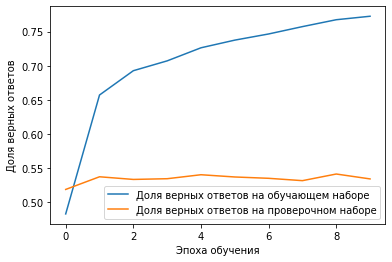

Epoch 1/10
138/138 [==============================] - 1s 5ms/step - loss: 0.3357 - accuracy: 0.8676 - val_loss: 0.4379 - val_accuracy: 0.8462
Epoch 2/10
138/138 [==============================] - 1s 5ms/step - loss: 0.0148 - accuracy: 0.9984 - val_loss: 0.3955 - val_accuracy: 0.8602
Epoch 3/10
138/138 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 0.9997 - val_loss: 0.4026 - val_accuracy: 0.8667
Epoch 4/10
138/138 [==============================] - 1s 4ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.4281 - val_accuracy: 0.8618
Epoch 5/10
138/138 [==============================] - 1s 5ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4249 - val_accuracy: 0.8627
Epoch 6/10
138/138 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4534 - val_accuracy: 0.8539
Epoch 7/10
138/138 [==============================] - 1s 4ms/step - loss: 9.6363e-04 - accuracy: 1.0000 - val_loss: 0.4397 - val_accuracy: 0.8611
Ep

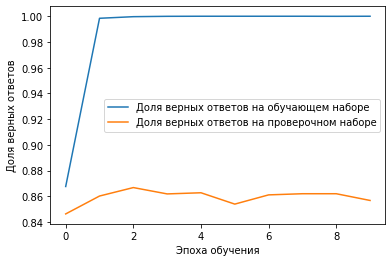

In [ ]:
maxWordsCount_list = [100, 1000]
xLen = 1000
step = 100

for i in maxWordsCount_list:

  tokenizer = Tokenizer(num_words=i, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
  tokenizer.fit_on_texts(trainText)
  items = list(tokenizer.word_index.items())
  trainWordIndexes = tokenizer.texts_to_sequences(trainText)
  testWordInsexes = tokenizer.texts_to_sequences(testText)
  xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
  xTest, yTest = createSetsMultiClasses(testWordInsexes, xLen, step)
  xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
  xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

  model = createModel(i)

  history = model.fit(xTrain01,
                      yTrain,
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

  plt.plot(history.history['accuracy'],
          label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'],
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()


**дальше цикл затыкался и жаловался на нехватку ОЗУ**

Epoch 1/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1125 - accuracy: 0.9617 - val_loss: 0.3068 - val_accuracy: 0.8949
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 6.8514e-04 - accuracy: 1.0000 - val_loss: 0.3342 - val_accuracy: 0.8820
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 3.8325e-04 - accuracy: 1.0000 - val_loss: 0.3084 - val_accuracy: 0.8884
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 1.7011e-04 - accuracy: 1.0000 - val_loss: 0.3046 - val_accuracy: 0.8904
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 1.1718e-04 - accuracy: 1.0000 - val_loss: 0.2937 - val_accuracy: 0.8928
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 7.6773e-05 - accuracy: 1.0000 - val_loss: 0.2862 - val_accuracy: 0.8962
Epoch 7/10
138/138 [==============================] - 1s 9ms/step - loss: 6.7038e-05 - accuracy: 1.0000 - val_loss: 0.2952 - va

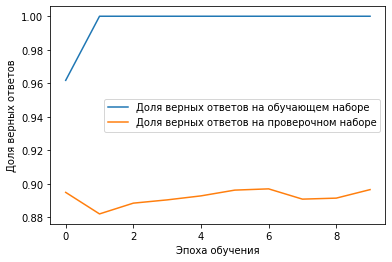

In [ ]:
xLen = 1000
step = 100

tokenizer = Tokenizer(num_words=10000, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
items = list(tokenizer.word_index.items())
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordInsexes = tokenizer.texts_to_sequences(testText)
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordInsexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

model = createModel(10000)

history = model.fit(xTrain01,
                    yTrain,
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
xLen = 1000
step = 100

Epoch 1/10
138/138 [==============================] - 3s 18ms/step - loss: 0.0877 - accuracy: 0.9672 - val_loss: 0.2687 - val_accuracy: 0.9133
Epoch 2/10
138/138 [==============================] - 2s 15ms/step - loss: 2.6720e-04 - accuracy: 1.0000 - val_loss: 0.2626 - val_accuracy: 0.9137
Epoch 3/10
138/138 [==============================] - 2s 16ms/step - loss: 1.5399e-04 - accuracy: 1.0000 - val_loss: 0.2700 - val_accuracy: 0.9071
Epoch 4/10
138/138 [==============================] - 2s 15ms/step - loss: 9.1237e-05 - accuracy: 1.0000 - val_loss: 0.2471 - val_accuracy: 0.9182
Epoch 5/10
138/138 [==============================] - 2s 15ms/step - loss: 5.4609e-05 - accuracy: 1.0000 - val_loss: 0.2489 - val_accuracy: 0.9179
Epoch 6/10
138/138 [==============================] - 2s 16ms/step - loss: 3.8416e-05 - accuracy: 1.0000 - val_loss: 0.2529 - val_accuracy: 0.9146
Epoch 7/10
138/138 [==============================] - 2s 16ms/step - loss: 3.0429e-05 - accuracy: 1.0000 - val_loss: 0.256

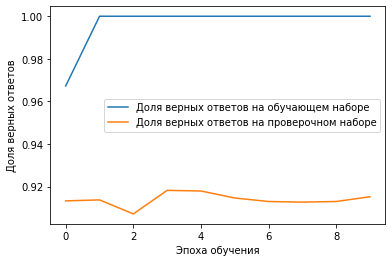

In [ ]:
tokenizer = Tokenizer(num_words=25000, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
items = list(tokenizer.word_index.items())
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordInsexes = tokenizer.texts_to_sequences(testText)
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordInsexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

model = createModel(25000)

history = model.fit(xTrain01,
                    yTrain,
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

100 - 0.53

1000 - 0.8567

10000 - 0.8965

25000 - 0.9253



Точность распознавания явно растёт при увеличении maxWordCount, посчитать при значении 50000 colab не позволил, что досадно... 
При увеличении этого параметра затраты ОЗУ растут очень заметно, поэтому при поиске оптимального варианта, кроме этого параметра необходимо варьировать также и другие.

In [ ]:
tokenizer = Tokenizer(num_words=20000, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
items = list(tokenizer.word_index.items())
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordInsexes = tokenizer.texts_to_sequences(testText)
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordInsexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

Epoch 1/10
138/138 [==============================] - 3s 19ms/step - loss: 0.0912 - accuracy: 0.9636 - val_loss: 0.3202 - val_accuracy: 0.8845
Epoch 2/10
138/138 [==============================] - 2s 14ms/step - loss: 1.6136e-04 - accuracy: 1.0000 - val_loss: 0.3176 - val_accuracy: 0.8860
Epoch 3/10
138/138 [==============================] - 2s 14ms/step - loss: 7.9771e-05 - accuracy: 1.0000 - val_loss: 0.2884 - val_accuracy: 0.8952
Epoch 4/10
138/138 [==============================] - 2s 14ms/step - loss: 5.0336e-05 - accuracy: 1.0000 - val_loss: 0.2780 - val_accuracy: 0.9002
Epoch 5/10
138/138 [==============================] - 2s 14ms/step - loss: 3.1020e-05 - accuracy: 1.0000 - val_loss: 0.2844 - val_accuracy: 0.8971
Epoch 6/10
138/138 [==============================] - 2s 14ms/step - loss: 2.2507e-05 - accuracy: 1.0000 - val_loss: 0.2880 - val_accuracy: 0.8950
Epoch 7/10
138/138 [==============================] - 2s 14ms/step - loss: 1.7064e-05 - accuracy: 1.0000 - val_loss: 0.288

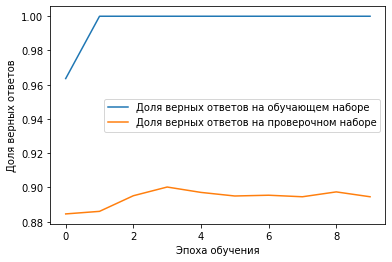

Epoch 1/10
138/138 [==============================] - 2s 17ms/step - loss: 0.0896 - accuracy: 0.9605 - val_loss: 0.2847 - val_accuracy: 0.8944
Epoch 2/10
138/138 [==============================] - 2s 15ms/step - loss: 9.0431e-05 - accuracy: 1.0000 - val_loss: 0.2585 - val_accuracy: 0.9079
Epoch 3/10
138/138 [==============================] - 2s 15ms/step - loss: 5.8330e-05 - accuracy: 1.0000 - val_loss: 0.2668 - val_accuracy: 0.9022
Epoch 4/10
138/138 [==============================] - 2s 15ms/step - loss: 3.7417e-05 - accuracy: 1.0000 - val_loss: 0.2572 - val_accuracy: 0.9098
Epoch 5/10
138/138 [==============================] - 2s 15ms/step - loss: 2.6814e-05 - accuracy: 1.0000 - val_loss: 0.2596 - val_accuracy: 0.9043
Epoch 6/10
138/138 [==============================] - 2s 15ms/step - loss: 2.0565e-05 - accuracy: 1.0000 - val_loss: 0.2590 - val_accuracy: 0.9046
Epoch 7/10
138/138 [==============================] - 2s 15ms/step - loss: 1.6518e-05 - accuracy: 1.0000 - val_loss: 0.257

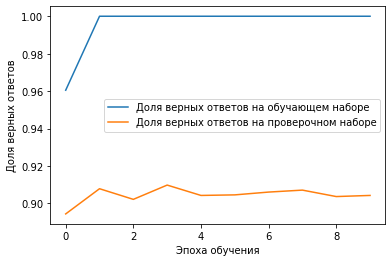

Epoch 1/10
138/138 [==============================] - 3s 20ms/step - loss: 0.0772 - accuracy: 0.9713 - val_loss: 0.2918 - val_accuracy: 0.8853
Epoch 2/10
138/138 [==============================] - 2s 17ms/step - loss: 7.3835e-05 - accuracy: 1.0000 - val_loss: 0.2597 - val_accuracy: 0.9044
Epoch 3/10
138/138 [==============================] - 2s 17ms/step - loss: 4.2517e-05 - accuracy: 1.0000 - val_loss: 0.2621 - val_accuracy: 0.9013
Epoch 4/10
138/138 [==============================] - 2s 16ms/step - loss: 3.1609e-05 - accuracy: 1.0000 - val_loss: 0.2548 - val_accuracy: 0.9068
Epoch 5/10
138/138 [==============================] - 2s 16ms/step - loss: 2.1643e-05 - accuracy: 1.0000 - val_loss: 0.2536 - val_accuracy: 0.9073
Epoch 6/10
138/138 [==============================] - 2s 16ms/step - loss: 1.4386e-05 - accuracy: 1.0000 - val_loss: 0.2583 - val_accuracy: 0.9049
Epoch 7/10
138/138 [==============================] - 2s 16ms/step - loss: 1.2097e-05 - accuracy: 1.0000 - val_loss: 0.257

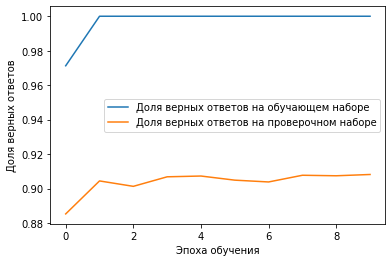

Epoch 1/10
136/138 [============================>.] - ETA: 0s - loss: 0.1275 - accuracy: 0.9253

In [ ]:
for i in [300, 400, 500, 600]:
  model = Sequential()
  model.add(Dense(i, input_dim=20000, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(6, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(xTrain01,
                      yTrain,
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

  plt.plot(history.history['accuracy'],
          label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'],
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

Epoch 1/10
138/138 [==============================] - 3s 20ms/step - loss: 0.1081 - accuracy: 0.9411 - val_loss: 0.3385 - val_accuracy: 0.8753
Epoch 2/10
138/138 [==============================] - 2s 16ms/step - loss: 4.2897e-05 - accuracy: 1.0000 - val_loss: 0.3106 - val_accuracy: 0.8842
Epoch 3/10
138/138 [==============================] - 2s 16ms/step - loss: 2.7331e-05 - accuracy: 1.0000 - val_loss: 0.2969 - val_accuracy: 0.8881
Epoch 4/10
138/138 [==============================] - 2s 16ms/step - loss: 1.8087e-05 - accuracy: 1.0000 - val_loss: 0.2926 - val_accuracy: 0.8901
Epoch 5/10
138/138 [==============================] - 2s 16ms/step - loss: 1.2830e-05 - accuracy: 1.0000 - val_loss: 0.2897 - val_accuracy: 0.8914
Epoch 6/10
138/138 [==============================] - 2s 16ms/step - loss: 1.0457e-05 - accuracy: 1.0000 - val_loss: 0.2836 - val_accuracy: 0.8938
Epoch 7/10
138/138 [==============================] - 2s 16ms/step - loss: 8.2766e-06 - accuracy: 1.0000 - val_loss: 0.281

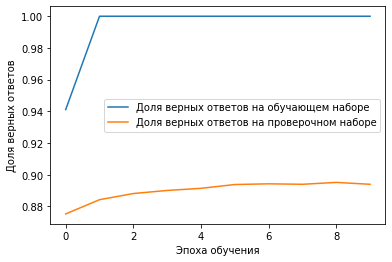

In [ ]:
model = Sequential()
model.add(Dense(600, input_dim=20000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(xTrain01,
                    yTrain,
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

При увеличении числа нейронов - точность почти не меняется, однако по графикам видна тенденция к росту точности на проверочных выборках, а значит при увеличении числа эпох это даст пару процентов.

0.8946, 0.9043, 0.9082, 0.8940 - при числе нейронов 300, 400, 500, 600 штук соответственно

Epoch 1/10
138/138 [==============================] - 2s 16ms/step - loss: 0.1006 - accuracy: 0.9639 - val_loss: 0.3294 - val_accuracy: 0.8815
Epoch 2/10
138/138 [==============================] - 2s 13ms/step - loss: 3.5814e-04 - accuracy: 1.0000 - val_loss: 0.3017 - val_accuracy: 0.8895
Epoch 3/10
138/138 [==============================] - 2s 13ms/step - loss: 1.9565e-04 - accuracy: 1.0000 - val_loss: 0.2911 - val_accuracy: 0.8956
Epoch 4/10
138/138 [==============================] - 2s 13ms/step - loss: 1.1256e-04 - accuracy: 1.0000 - val_loss: 0.2892 - val_accuracy: 0.8949
Epoch 5/10
138/138 [==============================] - 2s 13ms/step - loss: 7.5566e-05 - accuracy: 1.0000 - val_loss: 0.2659 - val_accuracy: 0.9050
Epoch 6/10
138/138 [==============================] - 2s 13ms/step - loss: 9.6950e-05 - accuracy: 1.0000 - val_loss: 0.2667 - val_accuracy: 0.9035
Epoch 7/10
138/138 [==============================] - 2s 14ms/step - loss: 3.8076e-05 - accuracy: 1.0000 - val_loss: 0.269

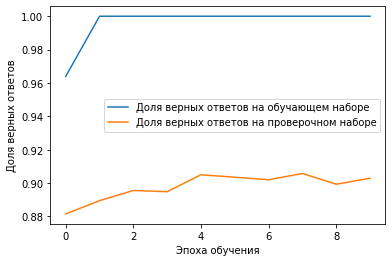

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=20000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(xTrain01,
                    yTrain,
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/10
138/138 [==============================] - 2s 17ms/step - loss: 0.1191 - accuracy: 0.9552 - val_loss: 0.2925 - val_accuracy: 0.8956
Epoch 2/10
138/138 [==============================] - 2s 15ms/step - loss: 1.1832e-04 - accuracy: 1.0000 - val_loss: 0.2829 - val_accuracy: 0.8989
Epoch 3/10
138/138 [==============================] - 2s 15ms/step - loss: 1.1974e-04 - accuracy: 1.0000 - val_loss: 0.2996 - val_accuracy: 0.8892
Epoch 4/10
138/138 [==============================] - 2s 14ms/step - loss: 4.8708e-05 - accuracy: 1.0000 - val_loss: 0.2565 - val_accuracy: 0.9088
Epoch 5/10
138/138 [==============================] - 2s 14ms/step - loss: 3.2130e-05 - accuracy: 1.0000 - val_loss: 0.2870 - val_accuracy: 0.8999
Epoch 6/10
138/138 [==============================] - 2s 14ms/step - loss: 2.2446e-05 - accuracy: 1.0000 - val_loss: 0.2896 - val_accuracy: 0.8990
Epoch 7/10
138/138 [==============================] - 2s 14ms/step - loss: 2.2404e-05 - accuracy: 1.0000 - val_loss: 0.287

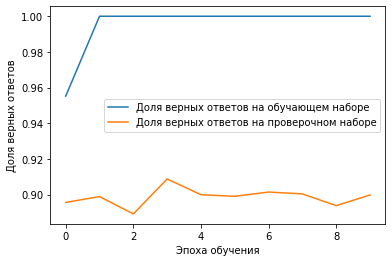

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=20000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(350, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(xTrain01,
                    yTrain,
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/10
138/138 [==============================] - 2s 17ms/step - loss: 0.1684 - accuracy: 0.9269 - val_loss: 0.2832 - val_accuracy: 0.9094
Epoch 2/10
138/138 [==============================] - 2s 15ms/step - loss: 3.0402e-04 - accuracy: 0.9999 - val_loss: 0.6379 - val_accuracy: 0.8398
Epoch 3/10
138/138 [==============================] - 2s 14ms/step - loss: 4.5600e-05 - accuracy: 1.0000 - val_loss: 0.4430 - val_accuracy: 0.8762
Epoch 4/10
138/138 [==============================] - 2s 14ms/step - loss: 2.1079e-05 - accuracy: 1.0000 - val_loss: 0.4009 - val_accuracy: 0.8842
Epoch 5/10
138/138 [==============================] - 2s 14ms/step - loss: 1.2271e-05 - accuracy: 1.0000 - val_loss: 0.3729 - val_accuracy: 0.8956
Epoch 6/10
138/138 [==============================] - 2s 14ms/step - loss: 1.0380e-04 - accuracy: 0.9999 - val_loss: 0.4373 - val_accuracy: 0.8878
Epoch 7/10
138/138 [==============================] - 2s 15ms/step - loss: 2.1118e-05 - accuracy: 1.0000 - val_loss: 0.761

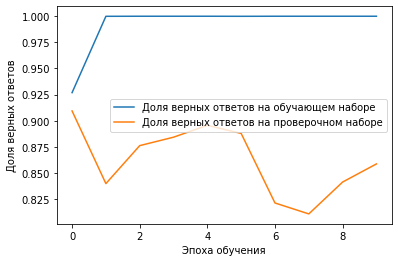

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=20000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(xTrain01,
                    yTrain,
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Судя по графикам - увеличение числа слоёв даёт непредсказуемый результат в плане точности, модель с одним слоем ведет себя более стабильно и тенденция к увеличению точности при росте числа эпох прослеживается более явно, однако так как ОЗУ почти заполнена, окончательные выводы сделать трудно.

Попробуем добиться точности распознавания 96%

In [ ]:
from google.colab import files, drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

def readText(filename):
  f = open(filename, 'r')
  text = f.read()
  text = text.replace('\n', ' ')
  return text

def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0

  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index + xLen])
    index += step

  return xSample

def createSetsMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))

  xSamples = []
  ySamples = []

  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))

  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)

  return (xSamples, ySamples)
  
className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]
nClasses = len(className)

drive.mount('/content/drive')
!rm -R /content/texts
!unzip -q '/content/drive/My Drive/Базы/Тексты писателей.zip' -d /content/texts

trainText = []
testText = []

for i in className:
  for j in os.listdir('texts/'):
    if i in j:

      if 'Обучающая' in j:
        trainText.append(readText('texts/' + j))
        print(j, 'добавлен в обучающую выборку')
      if 'Тестовая' in j:
        testText.append(readText('texts/' + j))
        print(j, 'добавлен в тестовую выборку')

  print()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(О. Генри) Тестовая_20 вместе.txt добавлен в тестовую выборку
(О. Генри) Обучающая_50 вместе.txt добавлен в обучающую выборку

(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Рэй Брэдберри) Обучающая_22 вместе.txt добавлен в обучающую выборку
(Рэй Брэдберри) Тестовая_8 вместе.txt добавлен в тестовую выборку



In [ ]:
xLen = 3500
step = 150

**Сначала добьёмся точности 96% с фильтром**

In [ ]:
tokenizer = Tokenizer(num_words=27000, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
items = list(tokenizer.word_index.items())
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordInsexes = tokenizer.texts_to_sequences(testText)
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordInsexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

Epoch 1/80
47/47 [==============================] - 1s 31ms/step - loss: 0.1921 - accuracy: 0.9021 - val_loss: 0.2244 - val_accuracy: 0.9130
Epoch 2/80
47/47 [==============================] - 1s 23ms/step - loss: 6.4665e-05 - accuracy: 1.0000 - val_loss: 0.1185 - val_accuracy: 0.9736
Epoch 3/80
47/47 [==============================] - 1s 23ms/step - loss: 2.9341e-04 - accuracy: 0.9999 - val_loss: 0.1810 - val_accuracy: 0.9470
Epoch 4/80
47/47 [==============================] - 1s 23ms/step - loss: 2.2494e-04 - accuracy: 0.9999 - val_loss: 0.3535 - val_accuracy: 0.8821
Epoch 5/80
47/47 [==============================] - 1s 22ms/step - loss: 4.5360e-05 - accuracy: 1.0000 - val_loss: 0.2300 - val_accuracy: 0.9110
Epoch 6/80
47/47 [==============================] - 1s 22ms/step - loss: 6.7611e-06 - accuracy: 1.0000 - val_loss: 0.1876 - val_accuracy: 0.9289
Epoch 7/80
47/47 [==============================] - 1s 22ms/step - loss: 4.1077e-06 - accuracy: 1.0000 - val_loss: 0.1693 - val_accura

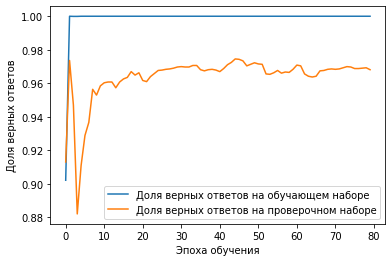

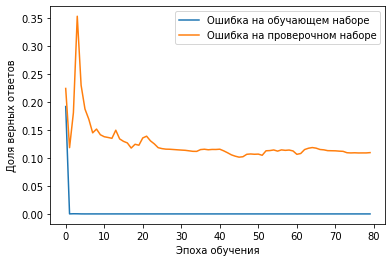

In [ ]:
model = Sequential()
model.add(Dense(350, input_dim=27000, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(xTrain01,
                    yTrain,
                    epochs=80,
                    batch_size=250,
                    validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
        label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
        label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Попробуем теперь без фильтров**

In [ ]:
from google.colab import files, drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

def readText(filename):
  f = open(filename, 'r')
  text = f.read()
  text = text.replace('\n', ' ')
  return text

def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0

  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index + xLen])
    index += step

  return xSample

def createSetsMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))

  xSamples = []
  ySamples = []

  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))

  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)

  return (xSamples, ySamples)
  
className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]
nClasses = len(className)

drive.mount('/content/drive')
!rm -R /content/texts
!unzip -q '/content/drive/My Drive/Базы/Тексты писателей.zip' -d /content/texts

trainText = []
testText = []

for i in className:
  for j in os.listdir('texts/'):
    if i in j:

      if 'Обучающая' in j:
        trainText.append(readText('texts/' + j))
        print(j, 'добавлен в обучающую выборку')
      if 'Тестовая' in j:
        testText.append(readText('texts/' + j))
        print(j, 'добавлен в тестовую выборку')

  print()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(О. Генри) Тестовая_20 вместе.txt добавлен в тестовую выборку
(О. Генри) Обучающая_50 вместе.txt добавлен в обучающую выборку

(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Рэй Брэдберри) Обучающая_22 вместе.txt добавлен в обучающую выборку
(Рэй Брэдберри) Тестовая_8 вместе.txt добавлен в тестовую выборку



In [ ]:
xLen = 3500
step = 150

In [ ]:
tokenizer = Tokenizer(num_words=30000, lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
items = list(tokenizer.word_index.items())
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordInsexes = tokenizer.texts_to_sequences(testText)
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordInsexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

Epoch 1/80
49/49 [==============================] - 2s 32ms/step - loss: 0.1913 - accuracy: 0.9083 - val_loss: 1.0504 - val_accuracy: 0.7568
Epoch 2/80
49/49 [==============================] - 1s 26ms/step - loss: 2.7712e-05 - accuracy: 1.0000 - val_loss: 0.7401 - val_accuracy: 0.7904
Epoch 3/80
49/49 [==============================] - 1s 25ms/step - loss: 1.0543e-05 - accuracy: 1.0000 - val_loss: 0.5852 - val_accuracy: 0.8168
Epoch 4/80
49/49 [==============================] - 1s 25ms/step - loss: 3.8142e-06 - accuracy: 1.0000 - val_loss: 0.5758 - val_accuracy: 0.8172
Epoch 5/80
49/49 [==============================] - 1s 24ms/step - loss: 3.1035e-06 - accuracy: 1.0000 - val_loss: 0.5438 - val_accuracy: 0.8241
Epoch 6/80
49/49 [==============================] - 1s 25ms/step - loss: 1.6940e-06 - accuracy: 1.0000 - val_loss: 0.5143 - val_accuracy: 0.8331
Epoch 7/80
49/49 [==============================] - 1s 25ms/step - loss: 2.4183e-06 - accuracy: 1.0000 - val_loss: 0.4870 - val_accura

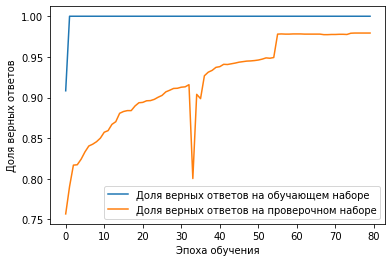

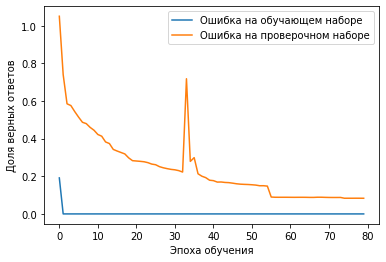

In [ ]:
model = Sequential()
model.add(Dense(400, input_dim=30000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(xTrain01,
                    yTrain,
                    epochs=80,
                    batch_size=250,
                    validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
        label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
        label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()